### Домашнее задание

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [17]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

#### 1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip).  

In [18]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(np.clip(y_pred, 1e-50, 1 - (1e-10))) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, 1e-50, 1 - (1e-10))))
    return err

In [19]:
# Пример применения
y_true = 1
y_pred = 1
calc_logloss(y_true, y_pred)

1.000000082790371e-10

In [20]:
# Пример применения
y_true = 1
y_pred = 0
calc_logloss(y_true, y_pred)

115.12925464970229

Сделал так, чтобы в np.log не попадали не 0 не 1

#### 2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [21]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [22]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X = X.copy()
X[:, 2] = standard_scaler(X[:, 2])
X[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [23]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [25]:
eval_LR_model(X, y, iterations=10000, alpha=300) 

1000 [-1867.42989341  -279.99246887  -417.4995521   1706.33264797] 4.757309162495939e-06
2000 [-1867.67501322  -279.51790769  -417.75362765  1706.08752816] 3.3711173896614227e-06
3000 [-1867.83960475  -279.15616123  -417.95533598  1705.92293662] 2.614335358705259e-06
4000 [-1867.97002745  -278.86763556  -418.11652491  1705.79251393] 2.1350579124414726e-06
5000 [-1868.07837678  -278.62778208  -418.25054843  1705.6841646 ] 1.8042905926388712e-06
6000 [-1868.17108179  -278.42253903  -418.36523608  1705.59145958] 1.5622656180626814e-06
7000 [-1868.25209919  -278.24316767  -418.46546756  1705.51044219] 1.3774933623284842e-06
8000 [-1868.32404947  -278.08386985  -418.55448224  1705.43849191] 1.2318070063030248e-06
9000 [-1868.38875959  -277.94060148  -418.63453979  1705.37378179] 1.1139906030068374e-06
10000 [-1868.44755442  -277.81042948  -418.70727918  1705.31498696] 1.0167449136605736e-06


array([-1868.44755442,  -277.81042948,  -418.70727918,  1705.31498696])

##### Опыт показывает, что при постоянном увеличении количества итераций и значения alpha log loss постоянно уменьшается

#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred_proba).

In [26]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [27]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot(X.T, (y_pred - y)))
    return w

In [28]:
def standard_scaler(x):
    res = (x - x.mean()) / x.std()
    return res

X = X.copy()
X[:, 2] = standard_scaler(X[:, 2])
X[:, 2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

Далее транспонируем матрицы, так как нам удобнее работать со строками

In [29]:
X_tr = X.transpose()
y_tr = y.reshape(1, y.shape[0])

Реализум функцию, возвращающую предсказанную вероятность класса 1

In [30]:
def calc_pred_proba(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))

    return A

In [31]:
w = eval_LR_model(X, y, iterations=1000, alpha=0.5)

pred_proba = calc_pred_proba(w, X_tr)
print(f"Предсказанные вероятности класса 1: {pred_proba[0]}")

Предсказанные вероятности класса 1: [0.27142194 0.17963641 0.98122786 0.22216112 0.71033953 0.35778609
 0.99436302 0.10401932 0.29847465 0.96415991]


#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred).

In [32]:
def calc_pred(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0

    return y_predicted

In [33]:
w = eval_LR_model(X, y, iterations=1000, alpha=0.5)

y_predicted = calc_pred(w, X_tr)
print(f"Предсказанные вероятности класса 1: {y_predicted[0]}")

Предсказанные вероятности класса 1: [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


#### 5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

##### accuracy

In [34]:
y_predicted = y_predicted[0].copy()
y_predicted

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [35]:
y_tr = y_tr[0].copy()
y_tr

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [36]:
accuracy = 100.0 - np.mean(np.abs(y_predicted - y_tr)*100.0)
accuracy

90.0

##### confusion_matrix

Напишем код для построения confusion_matrix по следующему принципу:


|  <empty>   | $$y = 1$$ | $$y = 0$$ |
--- | --- | ---
| __$$a_{1}(x) = 1$$__  |   0    |   0   |
| __$$a_{1}(x) = 0$$__ |   0   |  0  |

In [37]:
confusion_matrix_ = np.array([[0, 0], [0, 0]])
for i in range(len(y_tr)):
    if (y_tr[i] == 1) & (y_predicted[i] == 1):
        confusion_matrix_[0][0] += 1
        
    if (y_tr[i] == 0) & (y_predicted[i] == 0):
        confusion_matrix_[1][1] += 1
        
    if (y_tr[i] == 1) & (y_predicted[i] == 0):
        confusion_matrix_[1][0] += 1
        
    if (y_tr[i] == 0) & (y_predicted[i] == 1):
        confusion_matrix_[1] += 1

In [38]:
confusion_matrix_

array([[4, 0],
       [1, 5]])

Проверим

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tr, y_predicted)

array([[5, 0],
       [1, 4]], dtype=int64)

Если помнить, что ось истинных значений вертикатьная, а предсказаний - горизонтальная, то видно,что наши расчеты confusion_matrix - верные.

##### precision

$$precision(a, X) = \frac{TP}{TP+FP}.$$

In [40]:
precision = confusion_matrix_[0][0] / (confusion_matrix_[0][0] + confusion_matrix_[0][1])
precision

1.0

Проверим

In [41]:
from sklearn.metrics import precision_score
precision_score(y_tr, y_predicted)

1.0

##### recall

$$recall(a, X) = \frac{TP}{TP+FN},$$

In [42]:
𝑟𝑒𝑐𝑎𝑙𝑙 = confusion_matrix_[0][0] / (confusion_matrix_[0][0] + confusion_matrix_[1][0])
𝑟𝑒𝑐𝑎𝑙𝑙

0.8

Проверим

In [43]:
from sklearn.metrics import recall_score
recall_score(y_tr, y_predicted)

0.8

##### 𝐹1−𝑠𝑐𝑜𝑟𝑒

$$ F1-score = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

In [44]:
F_score = 2 * precision * recall /(precision + recall)
F_score

0.888888888888889

Проверим

In [45]:
from sklearn.metrics import f1_score
f1_score(y_tr, y_predicted)

0.888888888888889

#### 6. Могла ли модель переобучиться? Почему?

Да, модель может переобучиться также как и при обучении линейной ререссии. Это происходит потому, что вектор коэффициентов подбирается под конкретный набор данных (некоторые веса становятся очень большими) и при постоянном увеличении количества итераций и значения alpha метрики метрики могут быть хуже. Проверим это на примере. Для это нам понадобиться бОльшая выборка, что бы можно было разделить ее на обучающую и тестовую. Для большей наглдности я не буду масштабировать признаки

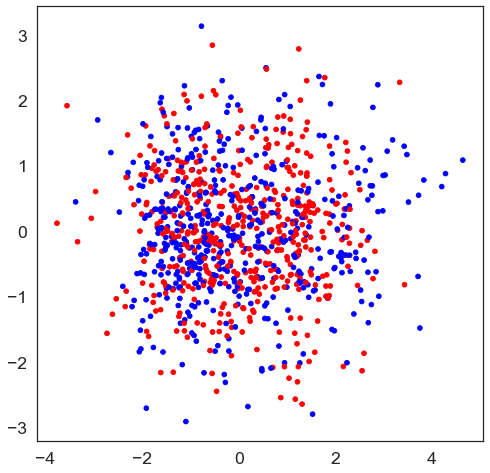

In [46]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

# сгеренируем данные с помощью sklearn.datasets
classes = datasets.make_classification(n_samples=1000, n_features=5, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
# datasets.make_blobs(centers = 5, cluster_std = 1, random_state=1)

# и изобразим их на графике
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

In [47]:
# перемешивание датасета
np.random.seed(41)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

Далее разделим выборку на обучающую и тестовую.

In [48]:
# разбивка на обучающую и тестовую выборки
train_proportion = 0.5
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (500, 5)
Размер массива признаков тестовой выборки (500, 5)
Размер массива ответов для обучающей выборки (500,)
Размер массива ответов для тестовой выборки (500,)


In [49]:
# # Масштабируем признаки
# def standard_scaler(x):
#     res = (x - x.mean()) / x.std()
#     return res

# X_train = X_train.copy()
# X_train = standard_scaler(X_train)

# X_test = X_test.copy()
# X_test = standard_scaler(X_test)

In [50]:
# Транспонируем признаки для удобства работы
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [51]:
def optimize(w, X, y, n_iterations, eta):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

In [52]:
# Напишем функцию для выполнения предсказаний
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
#     print(A)
    return y_predicted

In [53]:
def log_loss(w, X, y):
    m = X.shape[1]

    # используем функцию сигмоиды, написанную ранее
    A = sigmoid(np.dot(w.T, X)) # вероятность отнесения объекта к классу "+1"
    
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    # loss = -1.0 / m * np.log(1 + np.exp(np.dot(w.T, X)))
    grad = 1.0 / m * np.dot(X, (A - y).T)
    
    return loss, grad

Посморим как меняется f1 при изменении количества итеаций с 1 до 300

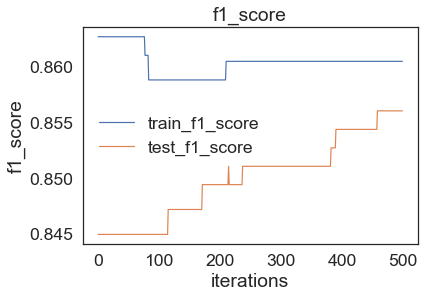

In [54]:
train_f1_score = []
test_f1_score = []

for i in range(1, 501):
    # иницилизируем начальный вектор весов
    w0 = np.zeros((X_train_tr.shape[0], 1))

    n_iterations = i
    eta = 0.01

    w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

    y_predicted_train = predict(w, X_train_tr)
    y_predicted_test = predict(w, X_test_tr)
    

    # В качестве меры точности возьмем f1_score
    
    f1_score_train = f1_score(y_train_tr[0], y_predicted_train[0])
    f1_score_test = f1_score(y_test_tr[0], y_predicted_test[0])
    
    train_f1_score.append(f1_score_train)
    test_f1_score.append(f1_score_test)

plt.title('f1_score')
plt.xlabel('iterations')
plt.ylabel('f1_score')
plt.plot(range(len(train_f1_score)), train_f1_score, label='train_f1_score');
plt.plot(range(len(test_f1_score)), test_f1_score, label='test_f1_score');
plt.legend();


In [55]:
w_1 = w

##### Видим, что в обоих случаях модель переобучается

#### 7. *Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

#### L2 регуляризация

In [56]:
# перемешивание датасета
np.random.seed(41)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

Далее разделим выборку на обучающую и тестовую.

In [57]:
# разбивка на обучающую и тестовую выборки
train_proportion = 0.5
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (500, 5)
Размер массива признаков тестовой выборки (500, 5)
Размер массива ответов для обучающей выборки (500,)
Размер массива ответов для тестовой выборки (500,)


In [58]:
# # Масштабируем признаки
# def standard_scaler(x):
#     res = (x - x.mean()) / x.std()
#     return res

# X_train = X_train.copy()
# X_train = standard_scaler(X_train)

# X_test = X_test.copy()
# X_test = standard_scaler(X_test)

In [59]:
# Транспонируем признаки для удобства работы
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [60]:
def optimize(w, X, y, n_iterations, eta, alpha):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * (grad + 2 * alpha * w)

        losses.append(loss)
        
    return w, losses

In [61]:
# Напишем функцию для выполнения предсказаний
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
#     print(A)
    return y_predicted

Посморим как меняется f1 при изменении количества итеаций с 1 до 300

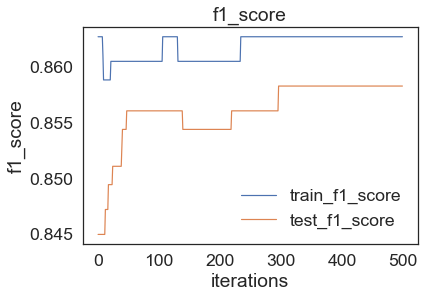

In [62]:
train_f1_score = []
test_f1_score = []

for i in range(1, 501):
    # иницилизируем начальный вектор весов
    w0 = np.zeros((X_train_tr.shape[0], 1))

    n_iterations = i
    eta = 0.01
    alpha = 0.1
    w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, alpha, eta)

    y_predicted_train = predict(w, X_train_tr)
    y_predicted_test = predict(w, X_test_tr)
    

    # В качестве меры точности возьмем f1_score
    
    f1_score_train = f1_score(y_train_tr[0], y_predicted_train[0])
    f1_score_test = f1_score(y_test_tr[0], y_predicted_test[0])
    
    train_f1_score.append(f1_score_train)
    test_f1_score.append(f1_score_test)

plt.title('f1_score')
plt.xlabel('iterations')
plt.ylabel('f1_score')
plt.plot(range(len(train_f1_score)), train_f1_score, label='train_f1_score');
plt.plot(range(len(test_f1_score)), test_f1_score, label='test_f1_score');
plt.legend();


In [63]:
w_1_l_2 = w

Посморим как меняется f1 при изменении значений скорости обучения с 0.001 до 1

In [64]:
w_1

array([[-0.04907834],
       [ 0.03825192],
       [ 0.05707463],
       [ 1.11011662],
       [ 0.01072386]])

In [65]:
w_1_l_2

array([[-0.00681178],
       [ 0.12299019],
       [ 0.12603075],
       [ 1.64404056],
       [ 0.04889121]])

По графикам видно, что переобучение снизилось и веса стали меньше

#### L1 регуляризация

In [66]:
# перемешивание датасета
np.random.seed(41)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

Далее разделим выборку на обучающую и тестовую.

In [67]:
# разбивка на обучающую и тестовую выборки
train_proportion = 0.5
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]
    
print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (500, 5)
Размер массива признаков тестовой выборки (500, 5)
Размер массива ответов для обучающей выборки (500,)
Размер массива ответов для тестовой выборки (500,)


In [68]:
# # Масштабируем признаки
# def standard_scaler(x):
#     res = (x - x.mean()) / x.std()
#     return res

# X_train = X_train.copy()
# X_train = standard_scaler(X_train)

# X_test = X_test.copy()
# X_test = standard_scaler(X_test)

In [69]:
# Транспонируем признаки для удобства работы
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [70]:
def optimize(w, X, y, n_iterations, eta, alpha):
#     потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * (grad +  alpha * np.sign(w))

        losses.append(loss)
        
    return w, losses

In [71]:
# Напишем функцию для выполнения предсказаний
def predict(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
#     print(A)
    return y_predicted

Посморим как меняется f1 при изменении количества итеаций с 1 до 300

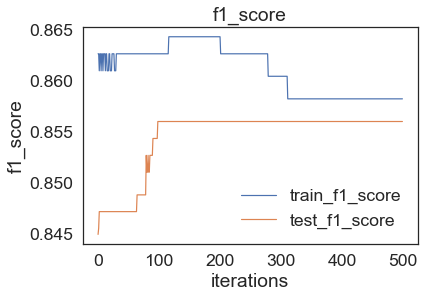

In [72]:
train_f1_score = []
test_f1_score = []

for i in range(1, 501):
    # иницилизируем начальный вектор весов
    w0 = np.zeros((X_train_tr.shape[0], 1))

    n_iterations = i
    eta = 0.01
    alpha = 0.03
    w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, alpha, eta)

    y_predicted_train = predict(w, X_train_tr)
    y_predicted_test = predict(w, X_test_tr)
    

    # В качестве меры точности возьмем f1_score
    
    f1_score_train = f1_score(y_train_tr[0], y_predicted_train[0])
    f1_score_test = f1_score(y_test_tr[0], y_predicted_test[0])
    
    train_f1_score.append(f1_score_train)
    test_f1_score.append(f1_score_test)

plt.title('f1_score')
plt.xlabel('iterations')
plt.ylabel('f1_score')
plt.plot(range(len(train_f1_score)), train_f1_score, label='train_f1_score');
plt.plot(range(len(test_f1_score)), test_f1_score, label='test_f1_score');
plt.legend();


In [73]:
w_1_l_1 = w

In [74]:
w_1

array([[-0.04907834],
       [ 0.03825192],
       [ 0.05707463],
       [ 1.11011662],
       [ 0.01072386]])

In [75]:
w_1_l_1

array([[-8.11923126e-05],
       [ 3.88653450e-02],
       [ 5.88497870e-02],
       [ 1.60187041e+00],
       [ 1.03949304e-04]])

По графикам видно, что переобучение после трехсотой итерации снизилось, а веса стали ОЧЕНЬ маленькими